# Diabetes Prediction



In [ ]:
# This is the path where dataset is stored and assigning that path to one variable named path
path = "D:/Study/DAB/SEM 2/200 - Machine Learning 1/final/diabetes.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
# Using pandas library loading the dataset 
data = pd.read_csv(path)

In [ ]:
# Printing out the shape of the dataset
print(data.shape)
# Printing out the first five records from the dataset 
# the overview of the dataset
data.head()

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
# printing out all the details.
data.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [ ]:
# Insight information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Installing pandas-profiling for generating Profile Report of the dataset
pip install pandas-profiling


  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=b58ea9cea742b18711ac41635f37c2ec5fb2d7e77b15a1b8b999ee2cf2bf0806
  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\70\e1\52\5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.1.0-py2.py3-none-any.whl size=291996 sha256=00c15bb408618cc14e19811bf5df0f5a547b4713ff5746284b93a29e18cd4943


  Stored in directory: c:\users\anant\appdata\local\pip\cache\wheels\16\72\b0\e5be34699908d9ff25dcb3debbb717987b766af61bbddffdfe
Successfully built htmlmin imagehash


In [ ]:
# Generating Profile Report of this dataset for Exploratory analysis
from pandas_profiling import ProfileReport
PR = ProfileReport(data)
PR

In [ ]:
# Checking is there any missing values or not using .isnull()
data.isnull().values.any()

False

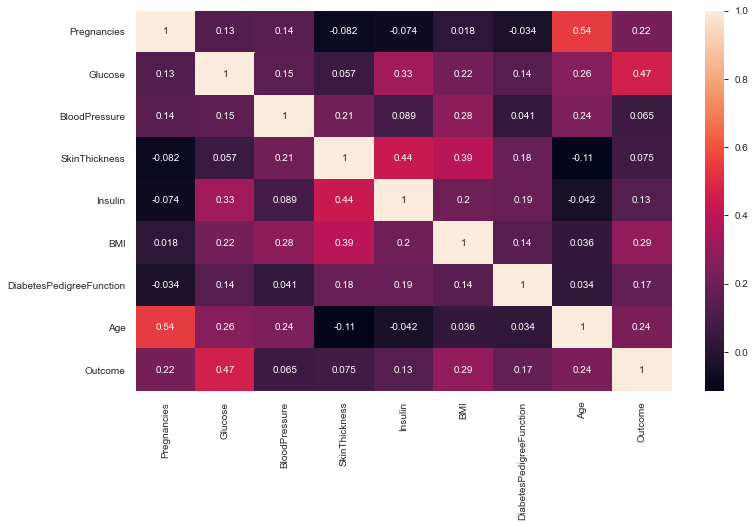

In [ ]:
#checking correlation of features by heatmap using seaboan library
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True)

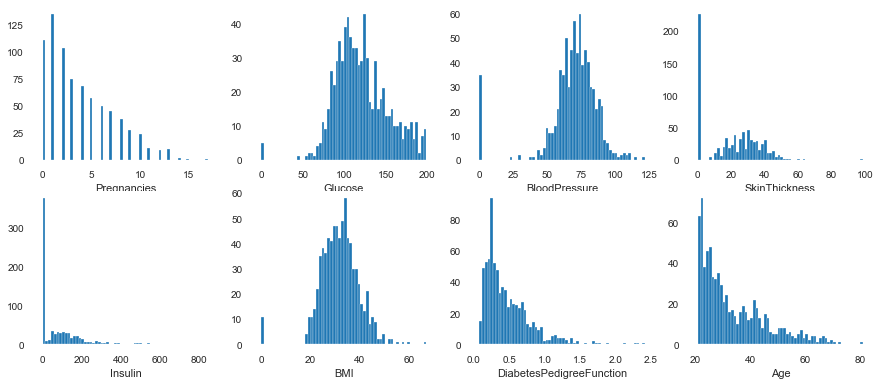

In [ ]:
#checking overall data
diabetes_plotting = data.drop(columns=['Outcome']) 
plt.figure(figsize=(15,13))
for i,col in enumerate(diabetes_plotting):
    plt.subplot(4,4,i+1)
    plt.xlabel(col)
    plt.hist(diabetes_plotting[col],bins=60)

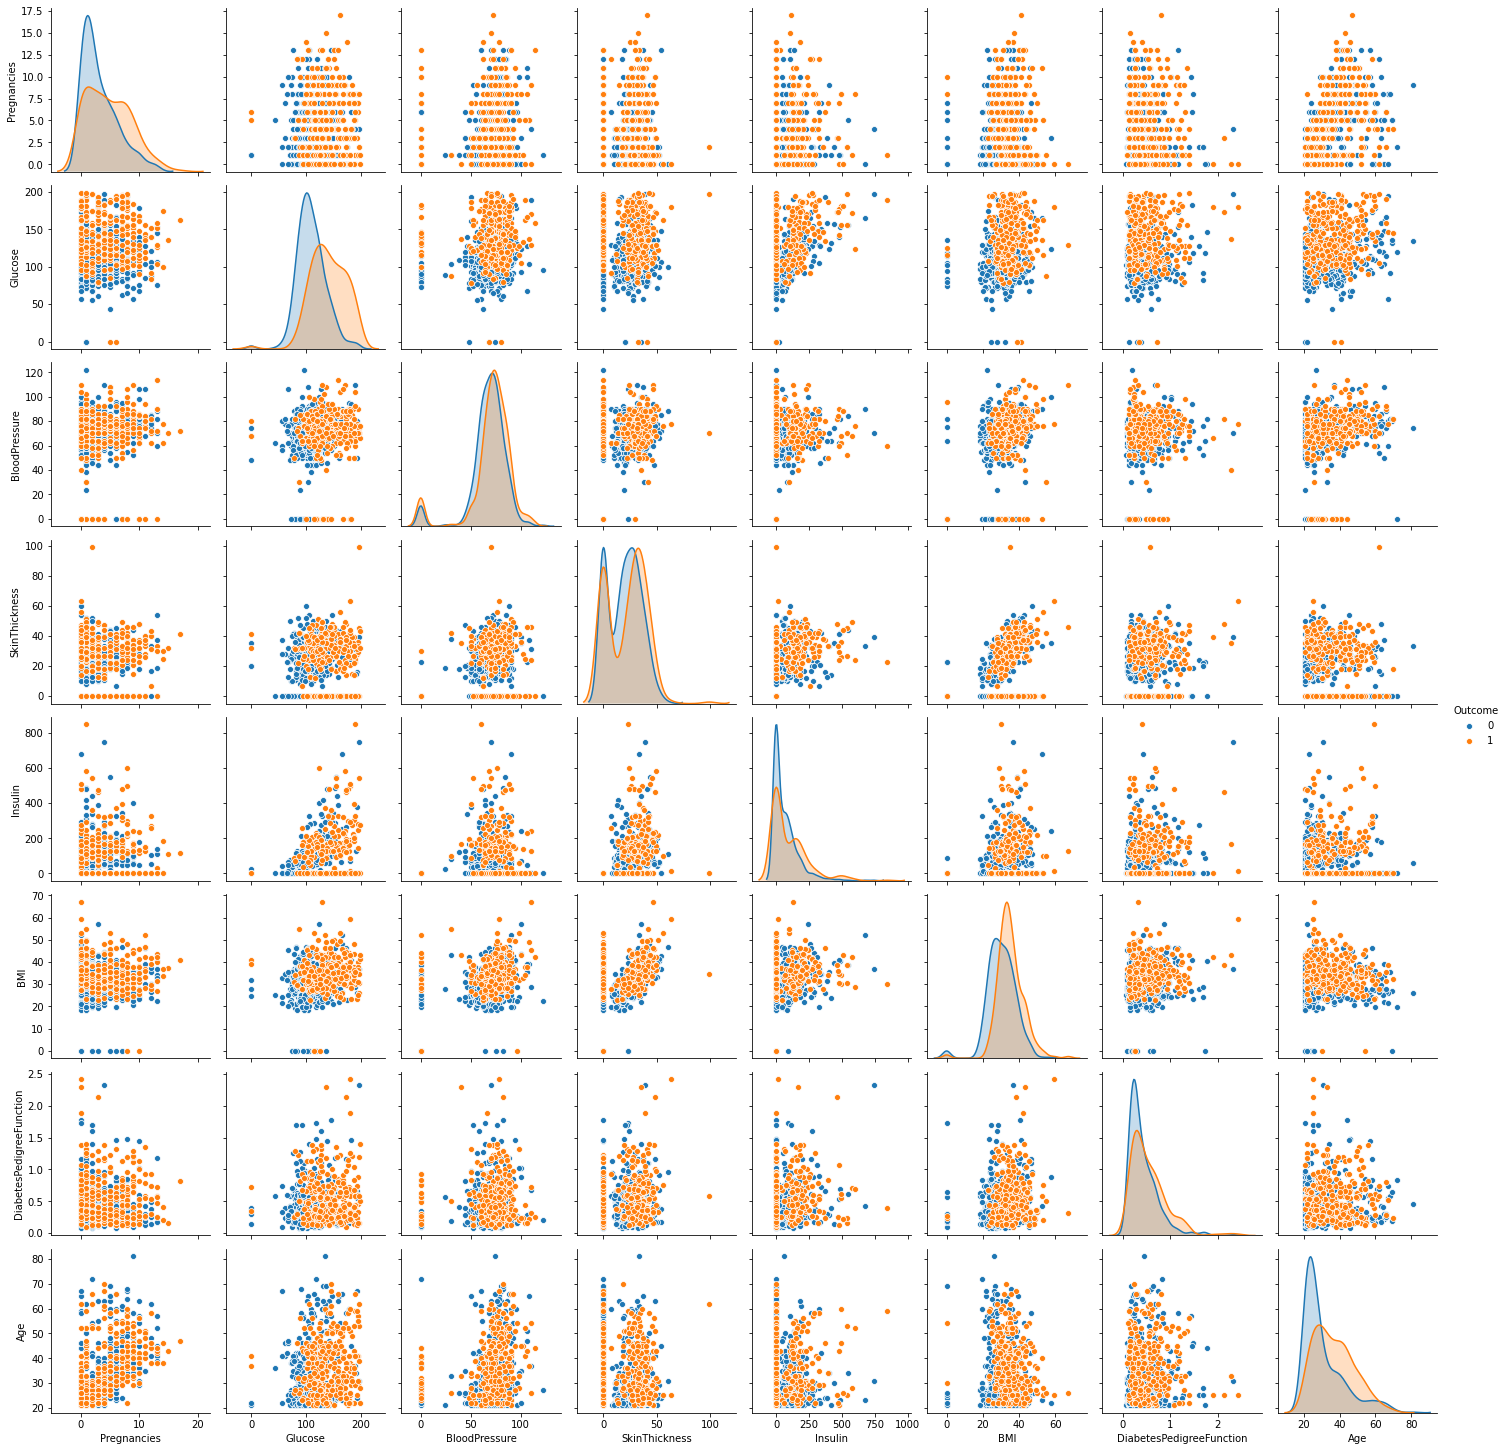

In [ ]:
# pairplot multiple relationship of scatterplot
sns.pairplot(data,hue = 'Outcome')

In [ ]:
# Assigning the whole data from the dataset into one variable called all_data.
all_data = data[:]
# Neglecting out one column named 'outcome' from the dataset which is going to be used as labels.
all_data = all_data.drop(['Outcome'], 1)
# Assigning column named 'outcome' to labels
labels = data["Outcome"]
# Spliting the data for training and testing as 90:10 ratio.
split = int(len(data) * 90 / 100)
X, Y, xtest, ytest = all_data[:split], labels[:split], all_data[split:], labels[split:]

In [ ]:
# Selecting the model which model we want to use and here we have taken four models and will be using all the models 
# And will see the accuracy from all the models otcome.
def getModel():
    from random import randint
    # creating dictionary for all the four models
    models = {1: [RandomForestClassifier(5), { 'n_estimators': list(range(randint(4,200)))}],
              2: [SVC(), {'kernel':('linear', 'rbf'), 'C':[1, 10]}], 
              3: [KNeighborsClassifier(5),{'n_neighbors': list(range(1, 31))} ], 
              4: [DecisionTreeClassifier(), {"max_features":list(range(randint(0, 5)))}]}
    # Taking user input
    x = int(input("Enter which model to use:\n1: RandomforestClassifier\n2: SVM\n3: kNN\n4: DecisionTree"))
    return models[x]

In [ ]:
# Created KFold for 4 folds which can be used for cross validation score with four folds.
def kFold():
    scores = []
    # 4 iterations
    for i in range(4):
        # Creating four folds 
        # Creating k-fold of 4 folds with random-state of 6333
        cv = KFold(n_splits=4, shuffle=True, random_state=6333) 
        # Appending score in scores list
        # Taking the user inserted model and training the data with every folds
        scores.append(cross_val_score(getModel()[0], X, Y, scoring='accuracy', cv=cv, n_jobs=-1)) 
    # Going through all the accuracy 
    for i in scores:
        # Printing out all the accuracied and minimum accuracy, maximum accuracy and average of accuracy
        print (min(i), max(i), sum(i)/len(i))

In [ ]:
# Processes of scanning the data to configure optimal parameters for a given model
def searchGridCV(X, Y, xtest, ytest):
    # Calling the getmodel()
    M = getModel()
    # Printing out the models
    print (M)
    # Assigning the model and it's parameters to variables named m and parameters respectively.
    m, parameters = M[0], M[1]
    model = RandomizedSearchCV(estimator = m, param_distributions = parameters)
    # Training the data
    
    Train_Acc_Score_CV = model.fit(X, Y)
    # Printing out the accuracy
    Test_Acc_Score_CV = model.score(xtest, ytest)
    print( "accuracy", Train_Acc_Score_CV)

In [ ]:
for i in range(4):
    # Taking the user input model and simple taking out accuracy
    model = getModel()[0]
    # Training the data
    m = model.fit(X, Y)
    m
    
    Train_Acc_Score = m.score(X, Y)
    print(Train_Acc_Score)
    Test_Acc_Score = m.score(xtest, ytest)
    print(Test_Acc_Score)
    
    # model.fit(X, Y)
    # Printing out the score of all the models used one by one
    #Acc_Score = model.score(xtest, ytest)
    #Acc_Score

#searchGridCV(X, Y, xtest, ytest)
#kFold()

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1
0.9782923299565847
0.7272727272727273
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree2
0.7626628075253257
0.7662337662337663
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3
0.7988422575976846
0.7662337662337663
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4
1.0
0.6623376623376623


Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1


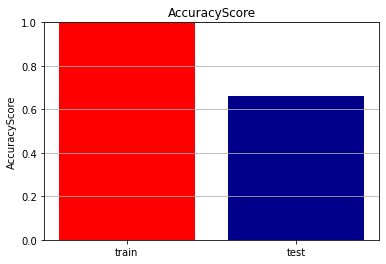

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree2


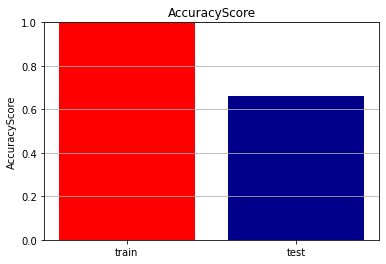

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3


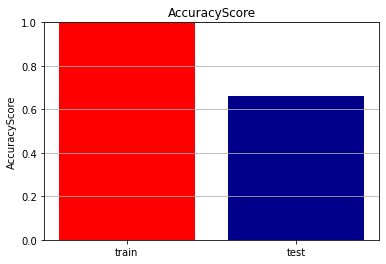

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4


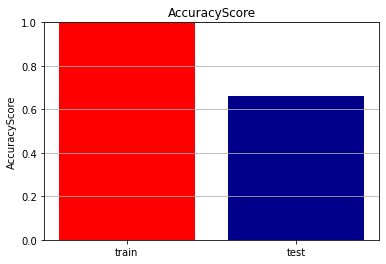

In [ ]:
for i in range(4):
    model = getModel()[0]
    #plotting accuracy score
    plt.bar(['train','test'],[Train_Acc_Score, Test_Acc_Score],color=('red','darkblue'))
    plt.title('AccuracyScore')
    plt.grid(axis='y')
    plt.ylim(0, 1)
    plt.ylabel('AccuracyScore')
    plt.show()


In [ ]:
# Now, with the use of searchGridCV we are taking out accuracy of all the four models 
for i in range(4):
   
    searchGridCV(X, Y, xtest, ytest)
    print("\n")
    print("\n")

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1
[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), {'n_estimators': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


0.7922077922077922 accuracy




Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3
[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}]
0.7402597402597403 accuracy




Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4
[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'), {'max_features': [0, 1

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
C:\Users\anant\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

In [ ]:
# Using kFold taking out accuracy of all the four models to see the best fit
# It will print min accuracy, max accuracy and average accuracy of all the models 
kFold()

Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree1
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree2
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree3
Enter which model to use:
1: RandomforestClassifier
2: SVM
3: kNN
4: DecisionTree4
0.7167630057803468 0.7456647398843931 0.7337343728995832
0.7283236994219653 0.7558139534883721 0.7409766097593763
0.6936416184971098 0.7283236994219653 0.7076808038714881
0.6453488372093024 0.6820809248554913 0.6613372093023255


In a nutshell, without using the searchGridCV and kFold the accuracy of Random forest is 0.72 and other models are getting aroung 0.76 and 0.67. However, by using searchGridCV the best fit we are getting is 0.81 for the RandomForest model followed by 0.79 for SVM, 0.74 for KNN and 0.68 for Decision tree which experienced no change in the accuracy. Moreover, we have used the kFold cross-validation method and the maximum outcome we are getting are 0.75, 0.74, 0.71 and 0.68. Thus, The best fit model for this dataset is Random Forest Classifier using searchGridCV. 